In [1]:
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split

import sys
sys.path.append("../")
from src.scalers import *
from src.metrics import *

## Keras CNN

### Load data

In [8]:
dataset = pd.DataFrame(pd.read_csv('../input/digit-recognizer/train.csv'))
dataset = np.array(dataset, dtype='float64')
X, y = dataset[:, 1:], dataset[:, 0, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
img_width, img_height = 28, 28

### Model

In [21]:
model = models.Sequential()

model.add(layers.Reshape(target_shape=(img_width, img_height, 1), name="Reshape1"))

# Convolutional layers
model.add(layers.Conv2D(
    32,
    (3, 3),
    activation="relu",
    kernel_initializer="he_normal",
    padding="same",
    name="Conv1",
))
model.add(layers.MaxPooling2D((2, 2), name="Pool1"))

model.add(layers.Conv2D(
    64,
    (3, 3),
    activation="relu",
    kernel_initializer="he_normal",
    padding="same",
    name="Conv2",
))
model.add(layers.MaxPooling2D((2, 2), name="Pool2"))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu", name="Dense1"))
model.add(layers.Dropout(0.2))

# Output layer
model.add(layers.Dense(10, activation="softmax", name="Dense2"))

# Compile the model and return
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1182/1182 [==============================] - 19s 16ms/step - loss: 11.6118 - accuracy: 0.3178 1s -
Epoch 2/30
1182/1182 [==============================] - 25s 21ms/step - loss: 1.2631 - accuracy: 0.5546
Epoch 3/30
1182/1182 [==============================] - 26s 22ms/step - loss: 0.8455 - accuracy: 0.7344
Epoch 4/30
1182/1182 [==============================] - 26s 22ms/step - loss: 0.6223 - accuracy: 0.8085
Epoch 5/30
1182/1182 [==============================] - 23s 19ms/step - loss: 0.4818 - accuracy: 0.85350s - loss:
Epoch 6/30
1182/1182 [==============================] - 22s 19ms/step - loss: 0.3111 - accuracy: 0.9123
Epoch 7/30
1182/1182 [==============================] - 23s 20ms/step - loss: 0.2301 - accuracy: 0.9364
Epoch 8/30
1182/1182 [==============================] - 26s 22ms/step - loss: 0.1888 - accuracy: 0.9463
Epoch 9/30
1182/1182 [==============================] - 25s 21ms/step - loss: 0.1657 - accuracy: 0.9528
Epoch 10/30
1182/1182 [=========================

In [23]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Reshape1 (Reshape)           (None, 28, 28, 1)         0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 14, 14, 64)        18496     
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
Dense1 (Dense)               (None, 64)               

In [24]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

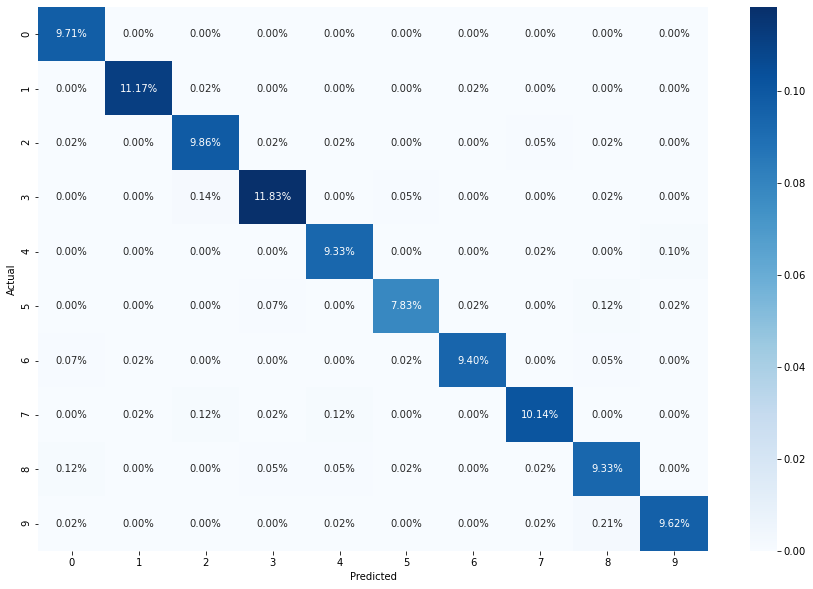

In [25]:
accuracy = plot_confusion_matrix(y_test, y_pred, fig_size=(15, 10))

In [26]:
print(f'Accuracy {accuracy}')

Accuracy 0.9823809523809524
